## Understanding the Project Scenario

**Problem Statement:**
Salifort Motors is facing a high employee turnover rate, leading to increased costs and decreased productivity. The leadership team seeks to understand the underlying factors contributing to turnover and develop strategies to improve retention.

**Objective:**
To build a predictive model that can accurately predict whether an employee will leave the company based on various factors such as job title, department, number of projects, average monthly hours, and other relevant data points.

**Data:**
* Employee survey data: Likely includes demographic information, job satisfaction, work-life balance, compensation, etc.
* Relevant variables: Consider factors like department, number of projects, average monthly hours, tenure, and potentially others.

**Model Approach:**
* **Statistical Model:** Logistic regression could be a suitable choice due to its ability to handle binary outcomes (leave or stay).
* **Machine Learning Models:** Decision trees, random forests, and XGBoost are potential candidates for their ability to handle complex relationships and potentially improve predictive accuracy.

**Evaluation:**
* Use appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC to assess the model's performance.

**Recommendations:**
* Based on the model's findings, identify key factors driving turnover.
* Propose strategies to address these factors and improve employee retention.

By following these steps, I can effectively address the employee turnover issue at Salifort Motors and contribute to the company's success.


## PACE Strategy Table for the Salifort Motors Project

| Milestone | Task | PACE Stage |
|---|---|---|
| **Data Acquisition and Exploration** | Collect employee survey data | Plan |
| | Clean and preprocess data | Do |
| | Explore data relationships and distributions | Check |
| | Identify relevant variables | Act |
| **Model Development and Selection** | Build logistic regression model | Plan |
| | Build decision tree, random forest, and XGBoost models | Do |
| | Evaluate model performance using appropriate metrics | Check |
| | Select the best-performing model | Act |
| **Model Interpretation and Insights** | Analyze model coefficients or feature importance | Plan |
| | Identify key factors driving turnover | Do |
| | Generate actionable recommendations | Check |
| | Communicate findings to leadership | Act |
| **Model Deployment and Monitoring** | Deploy model into production environment | Plan |
| | Monitor model performance and retrain as needed | Do |
| | Continuously evaluate and refine the model | Check |
| | Provide ongoing insights to leadership | Act |



Step 1. Imports
Import packages
Load dataset## Analyzing the Salifort Motors Employee Data

### Data Understanding

**Dataset:** HR_capstone_dataset.csv

**Rows:** 14,999 (representing individual employees)

**Columns:** 10 (containing various employee attributes)

**Column Descriptions:**

| Column Name | Type | Description |
|---|---|---|
| satisfaction_level | int64 | Self-reported satisfaction level (0-1) |
| last_evaluation | int64 | Score of last performance review (0-1) |
| number_project | int64 | Number of projects contributed to |
| average_monthly_hours | int64 | Average monthly working hours |
| time_spend_company | int64 | Years with the company |
| work_accident | int64 | Whether an accident occurred |
| left | int64 | Whether the employee left the company |
| promotion_last_5years | int64 | Whether promoted in the last 5 years |
| department | str | Employee's department |
| salary | str | Salary level (low, medium, high) |

### Initial Observations

* **Target Variable:** `left` (binary indicating employee attrition)
* **Predictor Variables:** `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spend_company`, `work_accident`, `promotion_last_5years`, `department`, and `salary`
* **Data Types:** Most variables are numerical (int64), while `department` and `salary` are categorical.

### Potential Relationships and Hypotheses

Based on the data, we can explore the following relationships and hypotheses:

* **Satisfaction and Attrition:** Employees with lower satisfaction levels may be more likely to leave.
* **Performance and Attrition:** Employees with poor performance reviews or excessive workload might be more likely to leave.
* **Tenure and Attrition:** Employees with shorter tenures may be more likely to leave due to lack of commitment or fit.
* **Promotions and Attrition:** Employees who feel undervalued or lack opportunities for growth may be more likely to leave.
* **Work-Life Balance and Attrition:** Employees with excessive working hours or poor work-life balance may be more likely to leave.
* **Department and Attrition:** Certain departments or roles might have higher turnover rates.
* **Salary and Attrition:** Employees who feel underpaid or dissatisfied with their compensation may be more likely to leave.

### Next Steps

1. **Data Cleaning and Preprocessing:**
   * Handle missing values (if any).
   * Check for outliers and inconsistencies.
   * Convert categorical variables (department, salary) to numerical format (e.g., one-hot encoding).

2. **Exploratory Data Analysis (EDA):**
   * Visualize the distribution of variables (histograms, box plots).
   * Calculate summary statistics (mean, median, mode, standard deviation).
   * Explore correlations between variables.

3. **Feature Engineering:**
   * Consider creating new features based on existing variables (e.g., calculate a work-life balance index).

4. **Model Building and Evaluation:**
   * Build and evaluate various models (logistic regression, decision trees, random forests, XGBoost).
   * Use appropriate metrics (accuracy, precision, recall, F1-score, AUC-ROC) to assess model performance.

5. **Interpretation and Recommendations:**
   * Analyze the model's results to identify key factors influencing attrition.
   * Provide actionable recommendations to improve employee retention.



## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

In [3]:
print("Dataset Shape:")
df0.shape

Dataset Shape:


(14999, 10)

In [4]:
print("\nData Types:")
df0.dtypes


Data Types:


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'satisfaction_level': 'satisfaction', 'last_evaluation': 'performance_score', 'number_project': 'projects',
       'average_montly_hours': 'average_hours', 'time_spend_company': 'tenure', 'promotion_last_5years': 'promotion', 'Department': 'department'})


# Display all column names after the update
print(df0.columns)

Index(['satisfaction', 'performance_score', 'projects', 'average_hours',
       'tenure', 'Work_accident', 'left', 'promotion', 'department', 'salary'],
      dtype='object')


### Check missing values

In [8]:
# Check for missing values
df0.isnull().sum()

satisfaction         0
performance_score    0
projects             0
average_hours        0
tenure               0
Work_accident        0
left                 0
promotion            0
department           0
salary               0
dtype: int64

### Check duplicates

In [9]:
# Check for duplicates
duplicates = df0.duplicated()
# Count the number of duplicates
num_duplicates = duplicates.sum()
# Print the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 3008


In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction,performance_score,projects,average_hours,tenure,Work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0_no_duplicates = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
print("First few rows of the dataframe without duplicates:")
df0_no_duplicates.head()

First few rows of the dataframe without duplicates:


,satisfaction,performance_score,projects,average_hours,tenure,Work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
print("Dataset Shape with duplicates:")
df0.shape

Dataset Shape with duplicates:


(14999, 10)

In [13]:
print("Dataset Shape with no duplicates:")
df0_no_duplicates.shape

Dataset Shape with no duplicates:


(11991, 10)

3,008 rows contain duplicates. That is 20% of the data.

### Check outliers

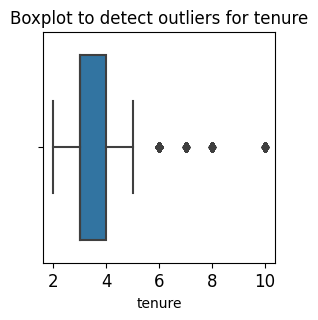

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(3,3))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x= df0_no_duplicates['tenure'])
plt.show()

In [15]:
# Determine the number of rows containing outliers

# Define a threshold for outliers (e.g., 1.5 times the interquartile range)
iqr = df0_no_duplicates['tenure'].quantile(0.75) - df0_no_duplicates['tenure'].quantile(0.25)
threshold = 1.5 * iqr
lower_bound = df0_no_duplicates['tenure'].quantile(0.25) - threshold
upper_bound = df0_no_duplicates['tenure'].quantile(0.75) + threshold

print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)

# Identify outliers
outliers = df0_no_duplicates[(df0_no_duplicates['tenure'] < lower_bound) | (df0_no_duplicates['tenure'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print("Number of outliers in 'tenure':", num_outliers)


Lower limit: 1.5
Upper limit: 5.5
Number of outliers in 'tenure': 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

**Relationships between Variables:**

* **Satisfaction Level and Attrition:** Lower satisfaction levels seem to be correlated with higher attrition rates.
* **Performance Evaluation and Attrition:** Employees with lower performance evaluations might be more likely to leave.
* **Number of Projects and Attrition:** A high number of projects could lead to increased stress and burnout, potentially contributing to higher attrition.
* **Average Monthly Hours and Attrition:** Excessive working hours might negatively impact job satisfaction and lead to attrition.
* **Tenure and Attrition:** Employees with shorter tenures might be more likely to leave, especially during the initial period of adjustment.

**Distributions in the Data:**

* **Satisfaction Level:** The distribution might be skewed, with a majority of employees having moderate to high satisfaction levels.
* **Performance Evaluation:** The distribution could be relatively normal, with most employees having average performance ratings.
* **Number of Projects:** The distribution might be skewed, with a few employees handling a large number of projects.
* **Average Monthly Hours:** The distribution might be skewed, with a few employees working significantly more hours than others.
* **Tenure:** The distribution might be skewed, with a higher proportion of employees having shorter tenures.

**Data Transformations:**

* **Categorical Variables:** Convert categorical variables like `department` and `salary` into numerical representations using techniques like one-hot encoding or label encoding.
* **Outliers:** Identify and handle outliers using techniques like capping, flooring, or removal, depending on the nature of the outliers and their impact on the analysis.
* **Feature Scaling:** If necessary, scale numerical features to a common range (e.g., using normalization or standardization) to ensure that all features have a similar impact on the model.

**Reasons for Transformations:**

* **Categorical Variables:** Numerical representations allow machine learning algorithms to process the data effectively.
* **Outliers:** Outliers can significantly impact the model's performance, so it's important to handle them appropriately.
* **Feature Scaling:** Scaling helps to improve the performance of many machine learning algorithms, especially those that use distance-based metrics.

**Purposes of EDA Before Model Construction:**

* **Understand the data:** Gain insights into the data's characteristics, distributions, and relationships between variables.
* **Identify patterns:** Discover patterns and trends that can inform feature engineering and model selection.
* **Detect anomalies:** Identify outliers, missing values, and inconsistencies in the data.
* **Inform feature engineering:** Create new features or transform existing ones to improve model performance.
* **Assess data quality:** Ensure the data is clean and suitable for analysis.

**Resources:**

* **Python libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost.
* **Online tutorials and courses:**
    * Coursera: [https://www.coursera.org/](https://www.coursera.org/)
    * Kaggle: [https://www.kaggle.com/](https://www.kaggle.com/)
    * DataCamp: [https://www.datacamp.com/](https://www.datacamp.com/)
* **Statistical textbooks:** Introductory statistics textbooks.

**Ethical Considerations:**

* **Data privacy:** Ensure compliance with data privacy regulations (e.g., GDPR, CCPA).
* **Bias:** Avoid bias in data collection, analysis, and model development.
* **Fairness:** Consider the potential impact of the model on different groups and ensure equitable treatment.
* **Transparency:** Explain the model's decision-making process and limitations.

## Step 2. Data Exploration (Continue EDA)

In [16]:
# Get numbers of people who left vs. stayed
num_left = df0_no_duplicates['left'].sum()
num_stayed = len(df0_no_duplicates) - num_left

# Get percentages of people who left vs. stayed
percentage_left = (num_left / len(df0_no_duplicates)) * 100
percentage_stayed = (num_stayed / len(df0_no_duplicates)) * 100

print(f"Number of employees who left: {num_left}")
print(f"Number of employees who stayed: {num_stayed}")
print(f"Percentage of employees who left: {percentage_left:.2f}%")
print(f"Percentage of employees who stayed: {percentage_stayed:.2f}%")

Number of employees who left: 1991
Number of employees who stayed: 10000
Percentage of employees who left: 16.60%
Percentage of employees who stayed: 83.40%


### Data visualizations

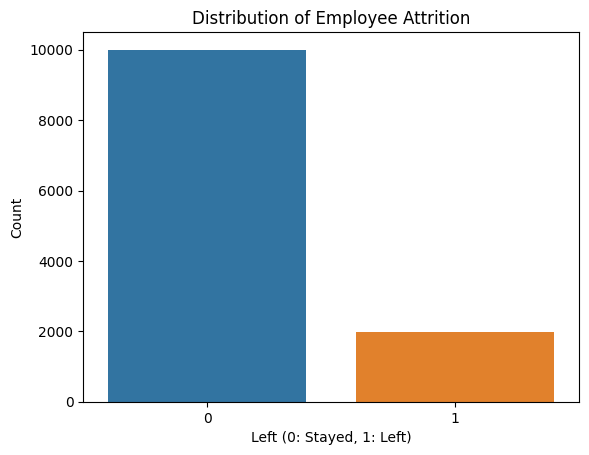

In [17]:
# Visualize the distribution of the target variable 'left'
sns.countplot(x='left', data=df0_no_duplicates)
plt.title('Distribution of Employee Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

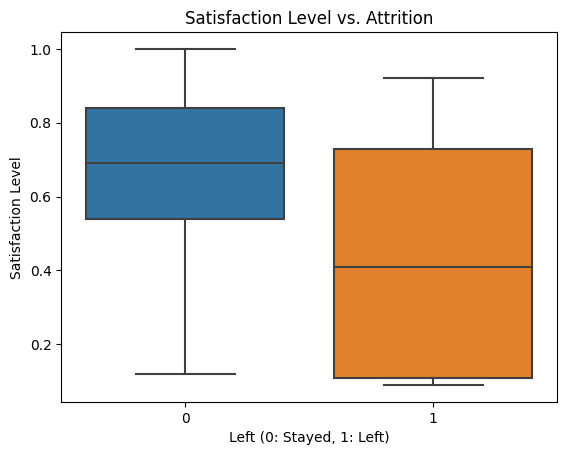

In [18]:
# Visualize the relationship between satisfaction level and attrition
sns.boxplot(x='left', y='satisfaction', data=df0_no_duplicates)
plt.title('Satisfaction Level vs. Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Satisfaction Level')
plt.show()

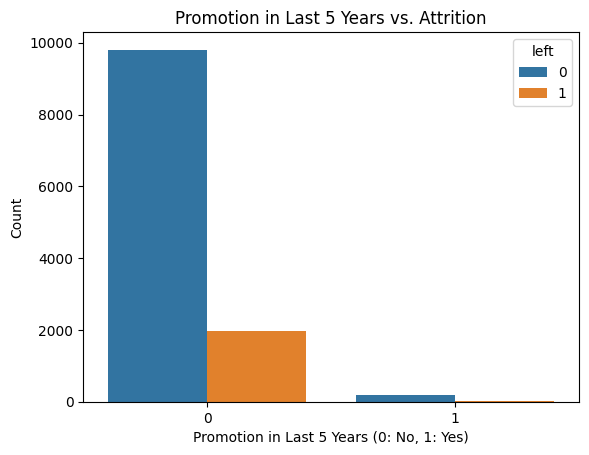

In [19]:
# Visualize the relationship between promotion in the last 5 years and attrition
sns.countplot(x='promotion', hue='left', data=df0_no_duplicates)
plt.title('Promotion in Last 5 Years vs. Attrition')
plt.xlabel('Promotion in Last 5 Years (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

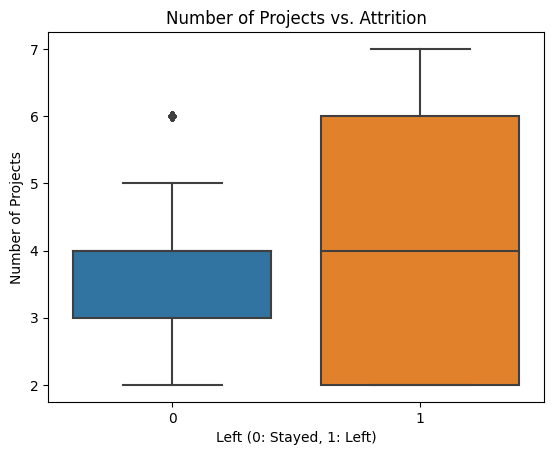

In [20]:
#This plot can help you understand if a higher number of projects is associated with higher attritio
sns.boxplot(x='left', y='projects', data=df0_no_duplicates)
plt.title('Number of Projects vs. Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Number of Projects')
plt.show()

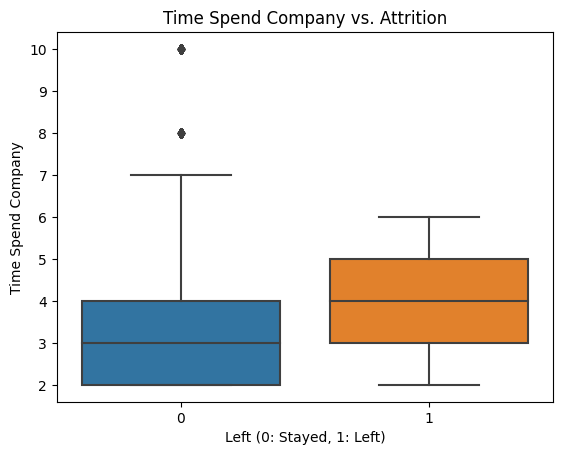

In [21]:
#This plot can help you identify if employees with specific tenures are more likely to leave
sns.boxplot(x='left', y='tenure', data=df0_no_duplicates)
plt.title('Time Spend Company vs. Attrition')
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Time Spend Company')
plt.show()

In [22]:
# Display counts for each department
df0_no_duplicates["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

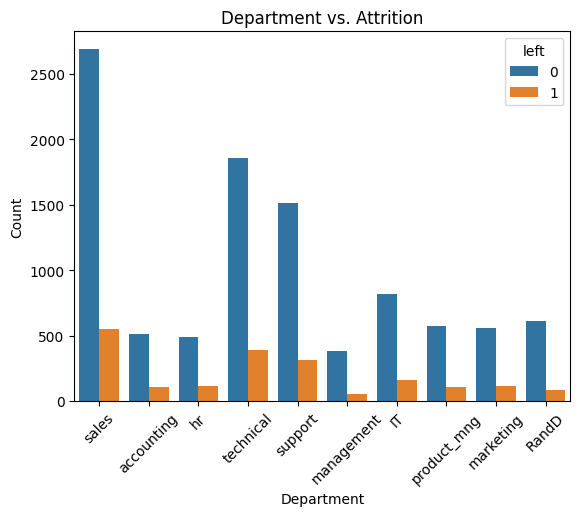

In [23]:
#This plot can help you understand if certain departments have higher attrition rates than others.
sns.countplot(x='department', hue='left', data=df0_no_duplicates)
plt.title('Department vs. Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

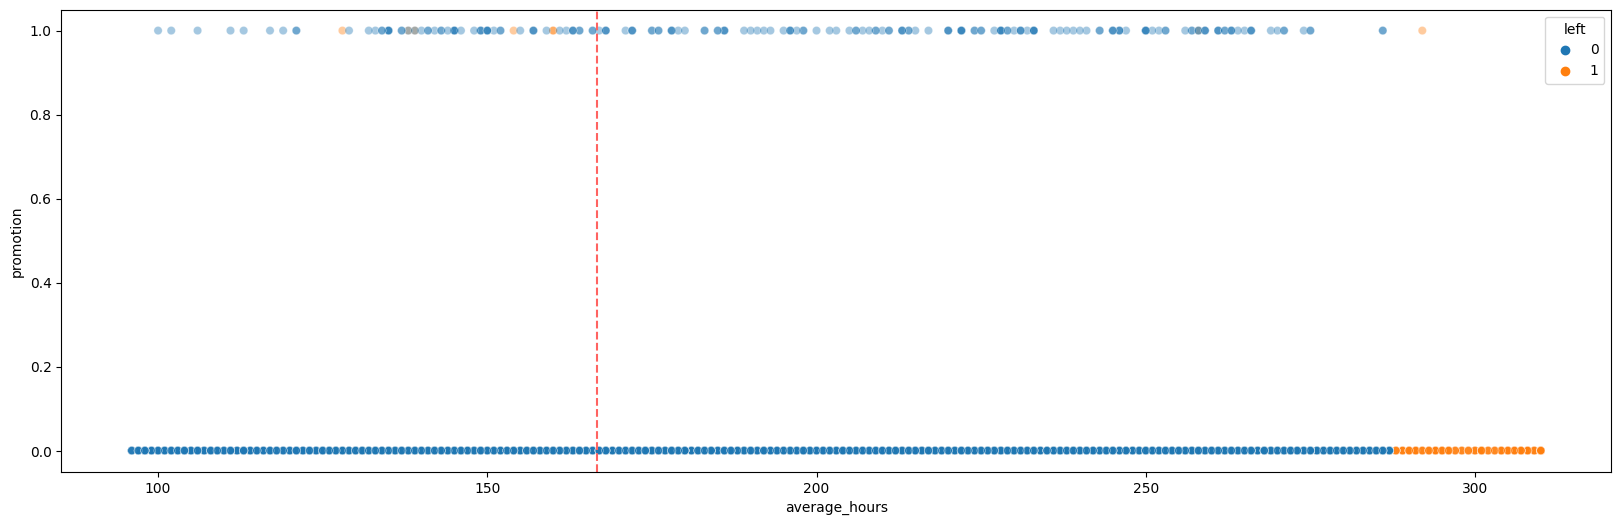

In [24]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df0_no_duplicates, x='average_hours', y='promotion', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')

The plot above shows the following:

* very few employees who were promoted in the last five years left
* very few employees who worked the most hours were promoted
* all of the employees who left were working the longest hours

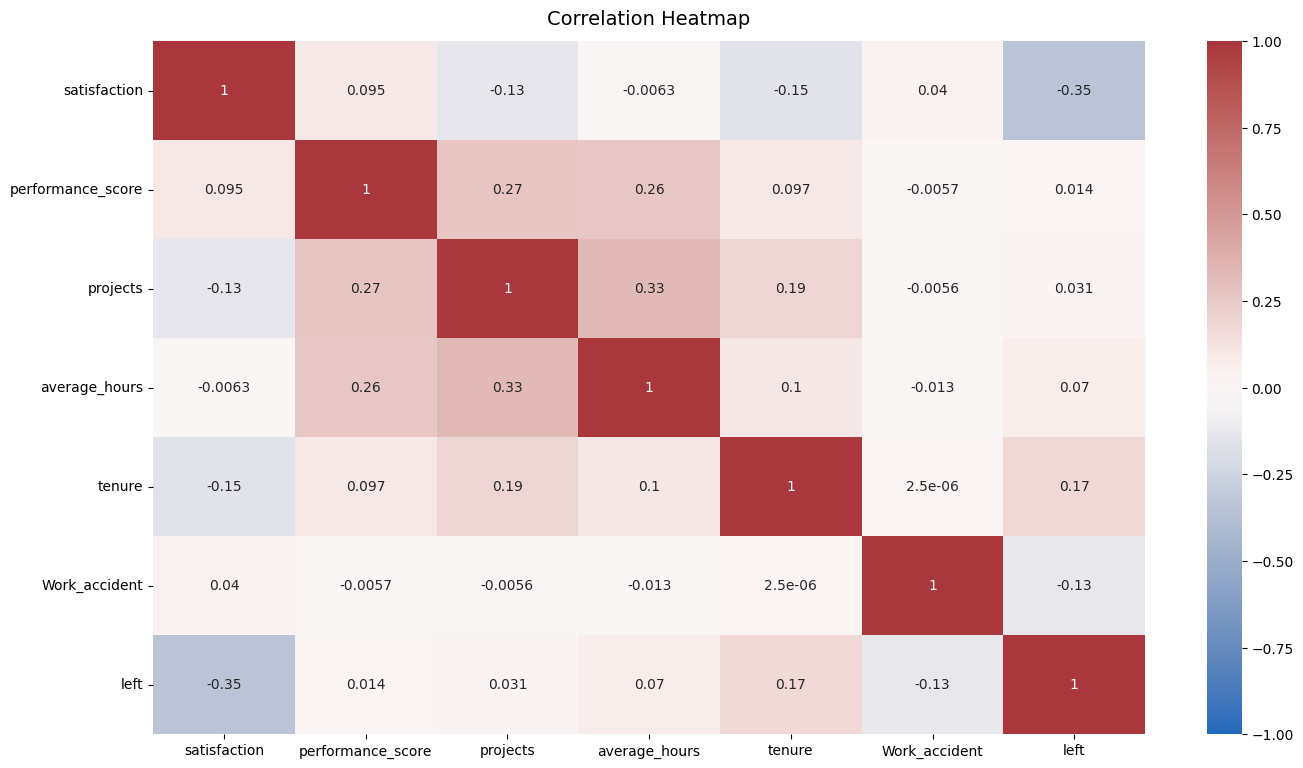

In [25]:
# Assuming 'df0_no_duplicates' is your DataFrame
columns_to_plot = ['satisfaction', 'performance_score', 'projects', 'average_hours',
       'tenure', 'Work_accident', 'left'] 

# Select the desired columns from the DataFrame
df_selected = df0_no_duplicates[columns_to_plot]

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_selected.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

- Imbalanced Dataset: The dataset is imbalanced, with a significantly higher number of employees who stayed compared to those who left. This imbalance might affect the performance of certain classification models.

- Satisfaction Level: Employees who left tend to have lower satisfaction levels compared to those who stayed. This suggests that job satisfaction is a crucial factor influencing employee retention.

- Number of Projects: Employees with a higher number of projects tend to have a higher attrition rate. This could indicate that excessive workload might contribute to employee burnout and turnover.

- Tenure: Employees with shorter tenures are more likely to leave. This suggests that employee retention strategies should focus on onboarding and early career development.

- Department: Certain departments, such as sales, technical, and support, seem to have higher attrition rates. This might be due to various factors, including workload, stress levels, and job satisfaction

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

Given that we're dealing with a binary classification problem, the following models are particularly suitable:

**1. Logistic Regression:**
   * A statistical model that predicts the probability of an event occurring.
   * It's a good starting point for binary classification problems.

**2. Decision Trees:**
   * A tree-based model that makes decisions based on a series of rules.
   * It's interpretable and can handle both numerical and categorical data.

**3. Random Forest:**
   * An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

**4. XGBoost:**
   * A powerful ensemble method that is often used for classification and regression tasks.
   * It's known for its efficient implementation and high performance.

**5. Support Vector Machines (SVM):**
   * A versatile machine learning algorithm that can be used for both classification and regression.
   * It's effective in high-dimensional spaces.

### Modeling

#### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [26]:
# Copy the dataframe
df_enc = df0_no_duplicates.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction,performance_score,projects,average_hours,tenure,Work_accident,left,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


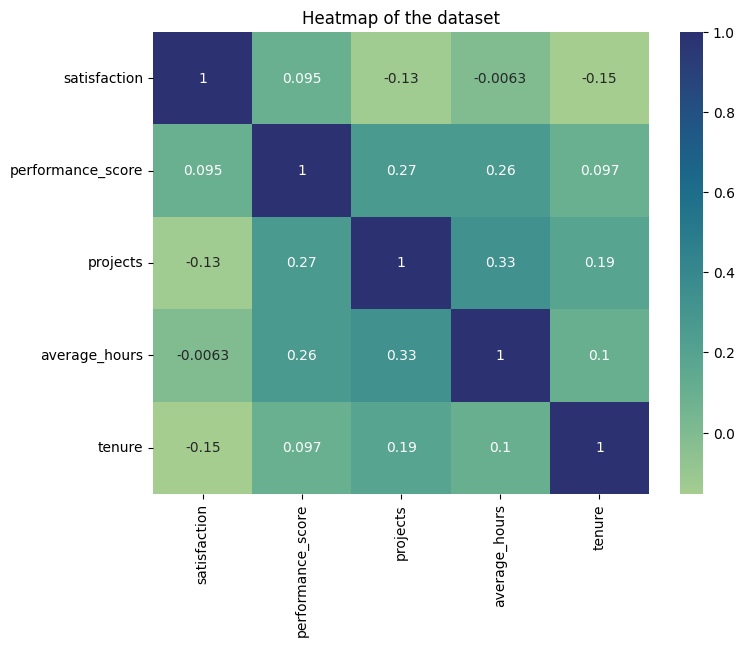

In [27]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction', 'performance_score', 'projects', 'average_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

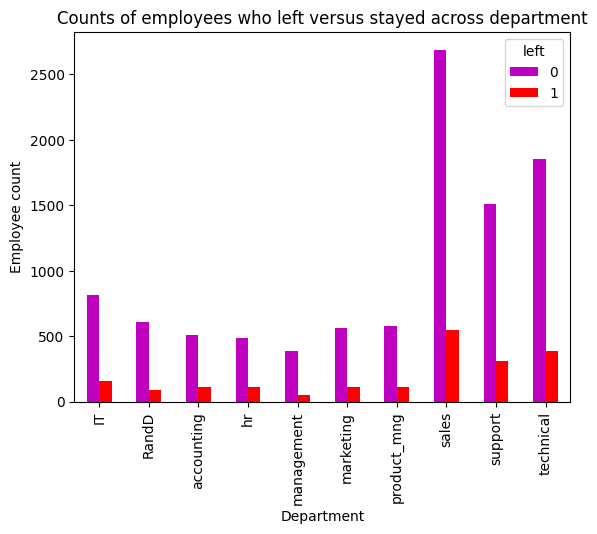

In [28]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df0_no_duplicates['department'], df0_no_duplicates['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

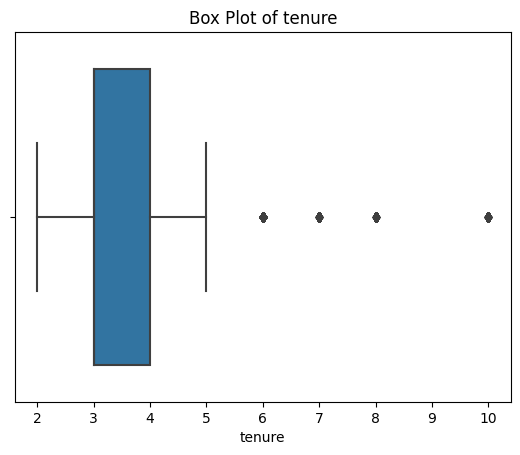

In [29]:
#A box plot visually represents the distribution of data, highlighting outliers as data points beyond the whiskers.
sns.boxplot(x=df0_no_duplicates['tenure'])
plt.title('Box Plot of tenure')
plt.show()

In [30]:
#Outliers can be defined as data points that lie outside of 1.5 times the IQR from the quartiles
Q1 = df_enc['tenure'].quantile(0.25)
Q3 = df_enc['tenure'].quantile(0.75)
IQR = Q3 - Q1

df_logreg = df_enc[(df_enc['tenure'] < Q1 - 1.5 * IQR) | (df_enc['tenure'] > Q3 + 1.5 * IQR)]
# Display first few rows of new dataframe
df_logreg.head()

,satisfaction,performance_score,projects,average_hours,tenure,Work_accident,left,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
17,0.78,0.99,4,255,6,0,1,0,0,False,False,False,False,False,False,False,True,False,False
34,0.84,0.87,4,246,6,0,1,0,0,False,False,False,True,False,False,False,False,False,False
47,0.57,0.70,3,273,6,0,1,0,0,False,False,False,False,False,False,False,False,True,False
67,0.90,0.98,4,264,6,0,1,0,1,False,False,False,False,False,False,True,False,False,False


In [31]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

1     1
17    1
34    1
47    1
67    1
Name: left, dtype: int64

In [32]:
# Split the data into features
X = df_logreg.drop('left', axis=1)
# Display the first few rows of the selected features 
X.head()

,satisfaction,performance_score,projects,average_hours,tenure,Work_accident,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
17,0.78,0.99,4,255,6,0,0,0,False,False,False,False,False,False,False,True,False,False
34,0.84,0.87,4,246,6,0,0,0,False,False,False,True,False,False,False,False,False,False
47,0.57,0.70,3,273,6,0,0,0,False,False,False,False,False,False,False,False,True,False
67,0.90,0.98,4,264,6,0,0,1,False,False,False,False,False,False,True,False,False,False


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [35]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

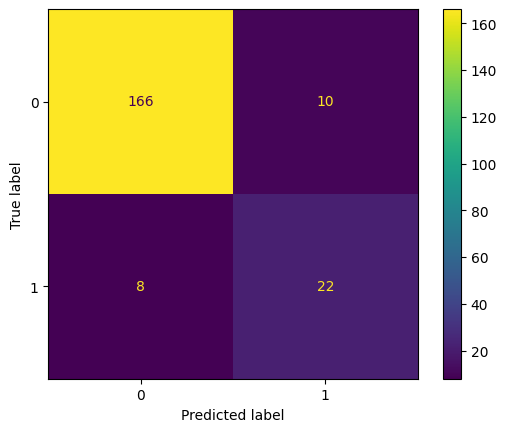

In [36]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [37]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.95      0.94      0.95       176
    Predicted would leave       0.69      0.73      0.71        30

                 accuracy                           0.91       206
                macro avg       0.82      0.84      0.83       206
             weighted avg       0.92      0.91      0.91       206



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

#### Decision tree - Round 1

In [38]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [39]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.85 s, sys: 5.36 ms, total: 2.85 s
Wall time: 2.87 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'accuracy', 'recall'})

Identify the optimal values for the decision tree parameters.

In [40]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

Identify the best AUC score achieved by the decision tree model on the training set.

In [41]:
# Check best AUC score on CV
tree1.best_score_

0.9449096258473714

This is a strong AUC score, which shows that this model can predict employees who will leave very well. 
Extract all the scores from the grid search.

In [42]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Use the function just defined to get all the scores from grid search.

In [43]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.891388,0.886842,0.879232,0.969271,0.94491


All of these scores from the decision tree model are strong indicators of good model performance.

#### Random forest - Round 1
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [44]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [45]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 8min 12s, sys: 3.13 s, total: 8min 15s
Wall time: 8min 15s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'roc_auc', 'accuracy', 'recall'})

Specify path to where you want to save your model.

In [46]:
# Define a path to the folder where you want to save the model
path = 'my_model.pkl'


Define functions to pickle the model and read in the model.

In [47]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [48]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [49]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identify the best AUC score achieved by the random forest model on the training set.

In [50]:
# Check best AUC score on CV
rf1.best_score_

0.967083006022519

Identify the optimal values for the parameters of the random forest model.

In [51]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [52]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy      auc
0  decision tree cv   0.891388  0.886842  0.879232  0.969271  0.94491
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.929233  0.911842  0.916622  0.978969  0.967083


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall. 
This indicates that the random forest model mostly outperforms the decision tree model.


Defining the function to get all the scores from a model's predictions.

In [53]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [54]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.848485,0.933333,0.888889,0.966019,0.952462
